In [1]:
import pandas as pd
data=pd.read_csv("shirtsize.csv")

size=pd.get_dummies(data['Size'],drop_first=True)
data['size']=size
data1=data.drop('Size',axis=1)
data1

,Height,Weight,size
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1
5,163,60,1
6,163,61,1
7,160,64,0
8,163,64,0
9,165,61,0


In [2]:
x=data1.drop('size',axis=1).values
y=data1['size'].values

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x,y)

y_pred=knn.predict(x)

y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [3]:
knn.predict([[161,61]])

array([1], dtype=uint8)

In [4]:
from sklearn import metrics
metrics.accuracy_score(y,y_pred)

0.8333333333333334

## bird.csv using KNN Module

In [3]:


import numpy as np
import pandas as pd

data=pd.read_csv("bird.csv")

Type=pd.get_dummies(data['type'],drop_first=True)

data1=pd.concat([data,Type],axis=1)
data1=data1.drop('type',axis=1)

x=data1.drop(['R','SO','SW','T','W'],axis=1)
y=data1[['R','SO','SW','T','W']]
x=x.drop('id',axis=1)

x.isnull().sum()
x=x.replace(np.nan,0)
x.isnull().sum()
#x
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

In [5]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7142857142857143

## bird.csv using Decision Tree

In [6]:
import pandas as pd

data_main=pd.read_csv("bird.csv")

data_main

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
5,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW
6,6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,SW
7,7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,SW
8,8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,SW
9,9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,SW


In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv("bird.csv")

target=pd.get_dummies(data['type'],drop_first=True)

data=pd.concat([data,target],axis=1)

data=data.drop('type',axis=1)

x=data.drop(['R','SO','SW','T','W','id'],axis=1)
y=data[['R','SO','SW','T','W']]

x=x.replace(np.nan,0)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
from  sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier(max_depth=2)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_pred=dec_tree.predict(x_test)

y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1.

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.5952380952380952

In [14]:
from sklearn.tree import export_graphviz

#export_graphviz(tree_cl,out_file="itis_tree.dot",feature_names=data.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)

export_graphviz(dec_tree,out_file="data_tree.dot",filled=True,rounded=True,feature_names=data_main.columns[1:11],class_names=data_main.type)

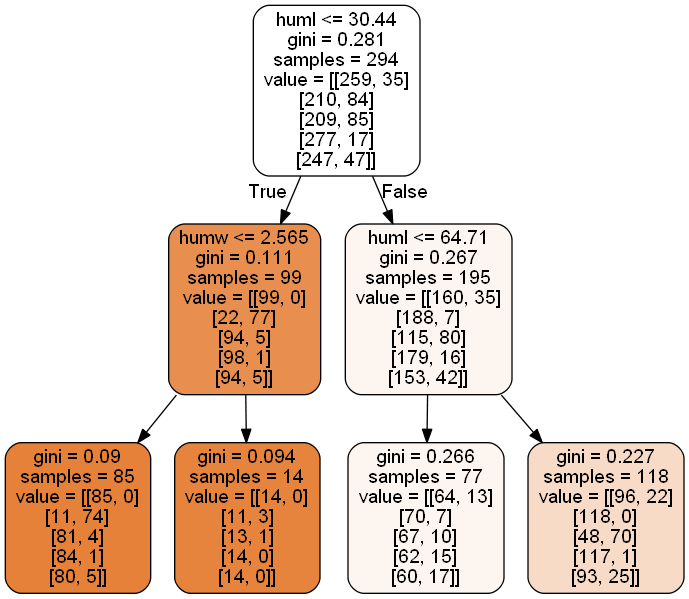

In [15]:
import os
os.environ['Path']+=os.environ['Path']+':'+r"C:\Users\RANGA\Anaconda3\Library\bin\graphviz\bin"
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(dec_tree,out_file=dot_data,filled=True,rounded=True,feature_names=data_main.columns[1:11],class_names=data_main.type)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())